In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [74]:
df=pd.read_csv("/kaggle/input/nlp-competition-cuet-ete-day-2023/train.csv")
df.head()

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3


In [75]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [76]:
#make sure to turn on internet on your kernel
#importing stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

## Downloading the stopwords.


In [77]:
import requests
import json

def load_stop_words_from_github():
    # Make a request to the GitHub raw content URL
    response = requests.get("https://github.com/eftekhar-hossain/Bengali-Document-Categorization/blob/041e2995cd59b40f465b82bf8fd930c32f6c0730/bangla_stopwords.txt")
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Read the content of the file into a list (array)
        
        json_data = json.loads(response.text)
        #print(json_data)
        return json_data['payload']['blob']['rawLines']
    else:
        # Print an error message if the request was not successful
        print(f"Failed to retrieve file from GitHub. Status code: {response.status_code}")
        return None

# Example usage
stop_words = load_stop_words_from_github()
nijer_list = ['এক', 'না', 'সাথে', 'একটা', 'যায়', 'হয়ে', 'একজন', 'দিয়ে', 'হয়', 'করে', 'মত', 'নেই', 
                  'আছে', 'আসে', 'থাকে', 'দেয়', 'নয়', 'আরো', 'একটু', 'নি', 'হবে', 'ছিলো', 'হয়তো', 'লেগেছে', 
                  'পাওয়া', 'এসেছে', 'করেছেন', 'একদিন', 'ছিল', 'পুরো', 'করেন', 'বের', 'টা', 'পৃষ্ঠা', 'কেমন', 'লাগে', 'কিভাবে', 
                  'পায়', 'আসলে', 'যাবে', 'সে', 'করেছে', 'গেছে', 'সকল', 'প্রতিটি', 'তবুও', 'গুলো', 'নেয়', 'সবচেয়ে', 'রয়েছে', 'হয়',
                  'তিন', 'জন্য', 'নিজেকে']
nijer_list2= ['ধীরে', 'চায়', 'কারো', 'ফেলে', 'গেলো', 'কারণে', 'মূল্যঃ', 'এদিকে', 'তে', 'সবাইকে', 'কিছুটা', 
              'থাকতে', 'নিয়েই', 'কিনা', 'ভালো', 'রেটিং', 'পড়ে', 'জন্যে', 'রিভিউ', 'প্রকাশনী', 'কম', 'ওঠে', 
              'হয়েছে', 'এসব', 'অবস্থা', 'হওয়া', 'পান', 'ওপর', 'অত্যন্ত', 'রাখতে', 'বইটি', 'বই', 'পেতে', 'পাবেন', 
              'দিয়েছেন', 'পাশাপাশি', 'এসব', 'করুন', 'ধরেছেন', 'ওঠে', 'হয়েছিল', 'লিখেছেন', 'অন্যতম', 'বই', 'ঝা', 
              'পড়ে', 'হয়েছে', 'বইটি', 'থাকতে', 'বইটিতে', 'তেমনি', 'কখনো', 'হয়েছিল', 'কারন', 'হিসেবে', 'বড়', 'জানে', 
              'কীভাবে', 'একমাত্র', 'এরপর', 'মধ্য', 'মাঝে', 'যাওয়ার', 'হওয়ার', 'ধরেছেন', 'রকমারিবইপোকারিভিউপ্রতিযোগিতা', 'জানি', 
              'উঠে', 'দেয়া', 'কিনা']
nijer_list3=['বুঝতে', 'থাকার', 'ছাড়া', 'করছি', 'বলার', 'হবার', 'লাগবে', 'হয়নি', 'এরকম', 'হয়নি', 'পারবেন', 
             'ঘটে', 'আপনাকে', 'এগিয়ে', 'জায়গায়', 'পড়তে', 'হয়নি', 'ভিন্ন', 'সবাই', 'লেখকঃ', 'ফুটিয়ে', 'আগের', 
             'রচিত', 'মানে', 'হবার', 'মূলত', 'পেয়ে', 'উঠেছে', 'এতো','টাকা','আরেক','পাঠক']
stop_words+=nijer_list
stop_words+=nijer_list2
stop_words+=nijer_list3


# Display the content of the array



## Removing the stopwords

In [78]:
def remove_custom_stopwords(text):
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'summary' column



# Display the updated DataFrame
print(df)

                                                summary            genre  \
0     #BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...   Childrens-Book   
1     বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...          Fiction   
2     মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...          Fiction   
3     ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...          Fiction   
4     ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...        Political   
...                                                 ...              ...   
3882  বিশ্ববিদ্যালয়ের অভ্যন্তরীণ কিছু ঘটনা, কিছু মা...          Fiction   
3883  ২০০৫ সালে সপ্তম শ্রেণীতে উঠে সাপ্তাহিক বই পড়া ...  Science-Fiction   
3884  আবহমান গ্রাম বাংলার একটি একান্নবর্তী পরিবারের ...          Fiction   
3885  আমার মত যারা ৯০'র দশকে জন্ম তারা আমরা অনেকেই ১...        Political   
3886  স্বাধীন বাংলাদেশের প্রথম বিরোধী রাজনৈতিক দল জা...        Political   

      Label  
0         2  
1         0  
2         0  
3         0  
4         3  
...

In [79]:
import re
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
df['summary'] = df.summary.apply(lambda x: preprocessing(str(x)))
df['summary'] = df['summary'].astype(str)
df['summary'] = df['summary'].apply(remove_custom_stopwords)
df['summary']= df['summary'].apply(stem_text)
df['summary'] = df['summary'].apply(remove_custom_stopwords)

df = df.dropna()
df.drop_duplicates(inplace=True)
df = df[df['summary'].apply(lambda x: len(x.split()) >= 1)]



## Expanding dataset

In [81]:
"""

def split_rows(row):
    words = row['summary'].split()
    chunk_size = 300
    num_chunks = len(words) // chunk_size
    new_rows = []
    
    for i in range(num_chunks):
        start_index = i * chunk_size
        end_index = (i + 1) * chunk_size
        new_row = row.copy()
        new_row['summary'] = ' '.join(words[start_index:end_index])
        new_rows.append(new_row)
    
    # Check if there are remaining words
    remaining_words = words[num_chunks * chunk_size:]
    if remaining_words:
        new_row = row.copy()
        new_row['summary'] = ' '.join(remaining_words)
        new_rows.append(new_row)
    
    return pd.DataFrame(new_rows)

# Apply the function to each row in the DataFrame and concatenate the results
df = pd.concat(df.apply(split_rows, axis=1).tolist(), ignore_index=True)

# Display the expanded DataFrame
print(df)
"""

"\n\ndef split_rows(row):\n    words = row['summary'].split()\n    chunk_size = 300\n    num_chunks = len(words) // chunk_size\n    new_rows = []\n    \n    for i in range(num_chunks):\n        start_index = i * chunk_size\n        end_index = (i + 1) * chunk_size\n        new_row = row.copy()\n        new_row['summary'] = ' '.join(words[start_index:end_index])\n        new_rows.append(new_row)\n    \n    # Check if there are remaining words\n    remaining_words = words[num_chunks * chunk_size:]\n    if remaining_words:\n        new_row = row.copy()\n        new_row['summary'] = ' '.join(remaining_words)\n        new_rows.append(new_row)\n    \n    return pd.DataFrame(new_rows)\n\n# Apply the function to each row in the DataFrame and concatenate the results\ndf = pd.concat(df.apply(split_rows, axis=1).tolist(), ignore_index=True)\n\n# Display the expanded DataFrame\nprint(df)\n"

In [82]:
def count_words(text):
    if isinstance(text, str):  
        words = text.split()
        return len(words)
    else:
        return 0  

In [83]:
# Apply the count_words function to each row of the 'summary' column
df['word_count'] = df['summary'].apply(count_words)

# Display the DataFrame with the added 'word_count' column
df[['summary', 'word_count']]

,summary,word_count
0,বইঃ চাঁ পাহাড় ধরনঃ অ্যাডভেঞ্চ বিভূতিভূষন বন্দ...,428
1,বেশির ভাগ ভাললাগে টাইপ ফার্স্ট পড় গল্প বর্ণনা ...,33
2,মিসির আলি ছাত্র ফারুক শ্বশুর বাড়ি কইলা গ্রামে ...,110
3,ছোটজাত ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরকম ...,228
4,ফালতু পয়সা নষ্ট বাজে লেখনী জিন বারবার কপি পেস্ট,9
...,...,...
3882,বিশ্ববিদ্যালয় অভ্যন্তরীণ ঘটনা মানুষ দ্বিমুখী ...,115
3883,সালে সপ্তম শ্রেণী সাপ্তাহিক পড়া ক্লাসে পড় লিস্...,221
3884,আবহমান গ্রাম বাংল একান্নবর্তী পরিবার জীবনগাথা ...,164
3885,দশ জন্ম নভেম্বর অভ্যুত্থান সম্পর্ পাঠক সহায়তা...,8


In [84]:
df['char_count'] = df['summary'].apply(lambda x: len(str(x)))
df.head()

,summary,genre,Label,word_count,char_count
0,বইঃ চাঁ পাহাড় ধরনঃ অ্যাডভেঞ্চ বিভূতিভূষন বন্দ...,Childrens-Book,2,428,2771
1,বেশির ভাগ ভাললাগে টাইপ ফার্স্ট পড় গল্প বর্ণনা ...,Fiction,0,33,215
2,মিসির আলি ছাত্র ফারুক শ্বশুর বাড়ি কইলা গ্রামে ...,Fiction,0,110,634
3,ছোটজাত ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরকম ...,Fiction,0,228,1343
4,ফালতু পয়সা নষ্ট বাজে লেখনী জিন বারবার কপি পেস্ট,Political,3,9,47


In [85]:
# Calculate average, maximum, and minimum character count
average_char_count = df['char_count'].mean()
max_char_count = df['char_count'].max()
min_char_count = df['char_count'].min()

# Display the results
print(f'Average Character Count: {average_char_count:.2f}')
print(f'Maximum Character Count: {max_char_count}')
print(f'Minimum Character Count: {min_char_count}')

Average Character Count: 1208.62
Maximum Character Count: 16705
Minimum Character Count: 3


In [86]:
df.describe()

,Label,word_count,char_count
count,3136.000000,3136.000000,3136.000000
mean,1.962691,184.678253,1208.624681
std,1.971620,149.995985,995.418195
min,0.000000,1.000000,3.000000
25%,0.000000,94.000000,605.750000
50%,1.000000,153.000000,999.000000
75%,4.000000,241.000000,1576.000000
max,6.000000,2505.000000,16705.000000


In [87]:
average_word_count = df['word_count'].mean()
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()

print(f'Average Word Count: {average_word_count:.2f}')
print(f'Maximum Word Count: {max_word_count}')
print(f'Minimum Word Count: {min_word_count}')


Average Word Count: 184.68
Maximum Word Count: 2505
Minimum Word Count: 1


In [88]:
null_values = df.isnull().sum()
null_values

summary       0
genre         0
Label         0
word_count    0
char_count    0
dtype: int64

In [89]:

len(df)

3136

In [90]:

len(df)

3136

In [91]:


def data_summary_to_file(dataset, output_file_path="/kaggle/working/example_file.txt"):
    '''
    This function will write the summary of the dataset to a file.

    Args:
    dataset: cleaned texts
    output_file_path: path to the output file (default: "/kaggle/working/example_file.txt")

    Returns:
    documents: Number of document per class
    words: Number of words per class
    u_words: Number of unique words per class
    class_label: name of the categories
    '''
    documents = []
    words = []
    u_words = []
    
    # find class names
    class_label = [k for k, v in dataset.genre.value_counts().to_dict().items()]

    with open(output_file_path, 'w') as output_file:
        for label in class_label:
            word_list = [word.strip().lower() for t in list(dataset[dataset.genre == label].summary) for word in t.strip().split()]
            counts = dict()
            for word in word_list:
                counts[word] = counts.get(word, 0) + 1
            # sort the dictionary of word list
            ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)

            # Documents per class
            documents.append(len(list(dataset[dataset.genre == label].summary)))
            # Total Word per class
            words.append(len(word_list))
            # Unique words per class
            u_words.append(len(np.unique(word_list)))

            # Write to the file
            output_file.write("\nClass Name : {}\n".format(label))
            output_file.write("Number of Documents: {}\n".format(len(list(dataset[dataset.genre == label].summary))))
            output_file.write("Number of Words: {}\n".format(len(word_list)))
            output_file.write("Number of Unique Words: {}\n".format(len(np.unique(word_list))))
            output_file.write("Most Frequent Words:\n")
            for k, v in ordered[:200]:
                output_file.write("{}\t{}\n".format(k, v))

    return documents, words, u_words, class_label

# Example usage
# pass the whole dataset into the function
df['summary'] = df['summary'].fillna('')
documents, words, u_words, class_names = data_summary_to_file(df)


In [92]:
label_counts = df['Label'].value_counts()

# Display the counts
print("Number of rows for each label:")
print(label_counts)


Number of rows for each label:
Label
0    1093
1     530
2     387
3     333
4     305
5     296
6     192
Name: count, dtype: int64


In [93]:
word_stats = df.groupby('Label')['word_count'].agg(['mean', 'min', 'max'])
word_stats

,mean,min,max
Label,,,
0,183.125343,1,1262
1,220.718868,2,882
2,160.258398,13,996
3,156.027027,1,1326
4,181.970492,1,920
5,206.108108,17,673
6,164.208333,6,2505


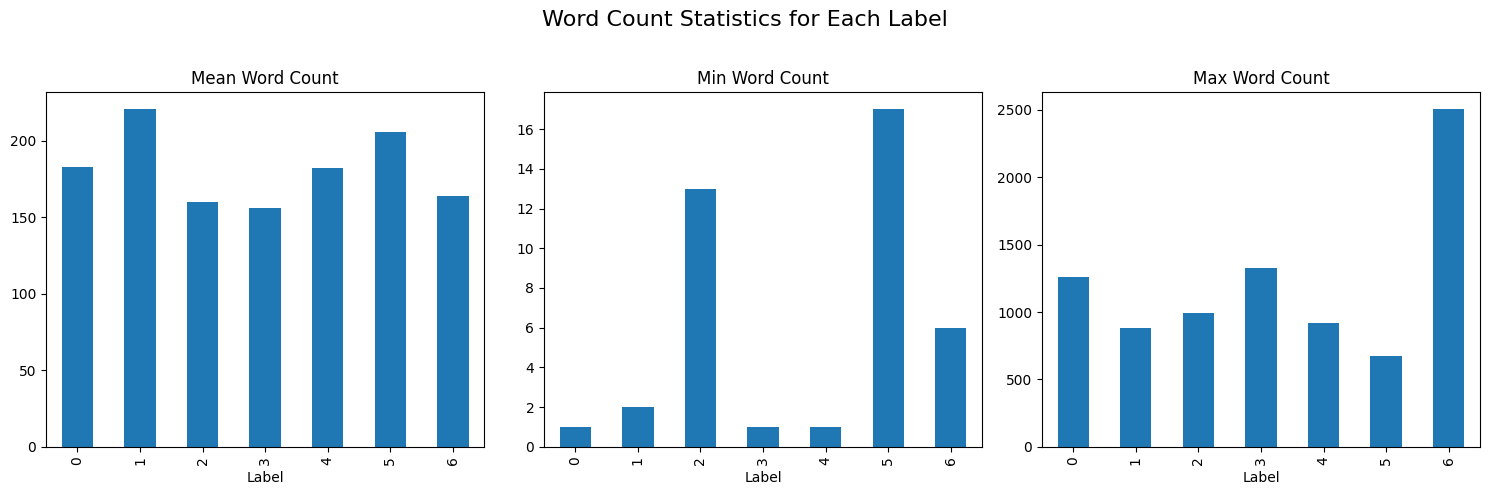

In [94]:
# Visualize the statistics using bar plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Word Count Statistics for Each Label', fontsize=16)

# Bar plot for mean word count
word_stats.plot(kind='bar', y=('mean'), ax=axes[0], legend=False)
axes[0].set_title('Mean Word Count')

# Bar plot for min word count
word_stats.plot(kind='bar', y=('min'), ax=axes[1], legend=False)
axes[1].set_title('Min Word Count')

# Bar plot for max word count
word_stats.plot(kind='bar', y=('max'), ax=axes[2], legend=False)
axes[2].set_title('Max Word Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [95]:
char_stats = df.groupby('Label')['char_count'].agg(['mean', 'min', 'max'])
char_stats

,mean,min,max
Label,,,
0,1173.001830,3,8575
1,1432.269811,12,5773
2,1007.806202,71,6513
3,1091.939940,4,8348
4,1193.026230,7,5472
5,1421.804054,94,4844
6,1097.338542,46,16705


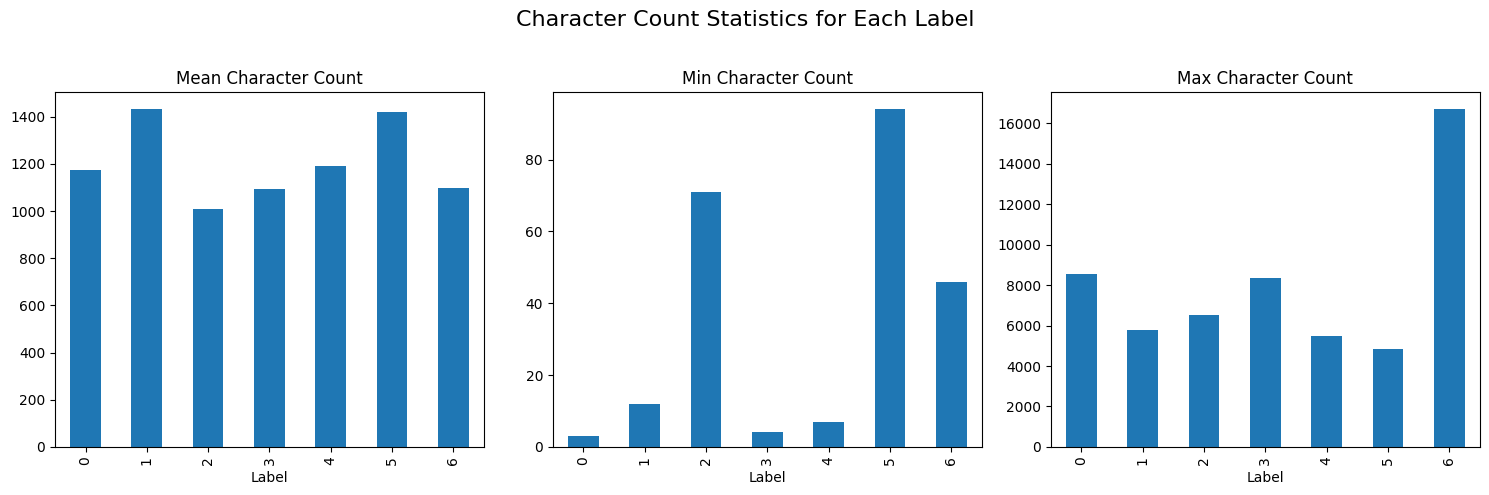

In [96]:
# Visualize the statistics using bar plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Character Count Statistics for Each Label', fontsize=16)

# Bar plot for mean character count
char_stats.plot(kind='bar', y=('mean'), ax=axes[0], legend=False)
axes[0].set_title('Mean Character Count')

# Bar plot for min character count
char_stats.plot(kind='bar', y=('min'), ax=axes[1], legend=False)
axes[1].set_title('Min Character Count')

# Bar plot for max character count
char_stats.plot(kind='bar', y=('max'), ax=axes[2], legend=False)
axes[2].set_title('Max Character Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [97]:
df = df.drop(['word_count', 'char_count'], axis=1)

In [98]:
df = df.drop(['genre'], axis=1)

In [99]:
df.head()

,summary,Label
0,বইঃ চাঁ পাহাড় ধরনঃ অ্যাডভেঞ্চ বিভূতিভূষন বন্দ...,2
1,বেশির ভাগ ভাললাগে টাইপ ফার্স্ট পড় গল্প বর্ণনা ...,0
2,মিসির আলি ছাত্র ফারুক শ্বশুর বাড়ি কইলা গ্রামে ...,0
3,ছোটজাত ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরকম ...,0
4,ফালতু পয়সা নষ্ট বাজে লেখনী জিন বারবার কপি পেস্ট,3


In [100]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['summary'],df["Label"],stratify=df['Label'],random_state=42,test_size=0.2)

In [101]:
!pip install ktrain

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [102]:
df.head()

,summary,Label
0,বইঃ চাঁ পাহাড় ধরনঃ অ্যাডভেঞ্চ বিভূতিভূষন বন্দ...,2
1,বেশির ভাগ ভাললাগে টাইপ ফার্স্ট পড় গল্প বর্ণনা ...,0
2,মিসির আলি ছাত্র ফারুক শ্বশুর বাড়ি কইলা গ্রামে ...,0
3,ছোটজাত ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরকম ...,0
4,ফালতু পয়সা নষ্ট বাজে লেখনী জিন বারবার কপি পেস্ট,3


In [103]:
import ktrain
from ktrain import text as texts

# **Bert-1 -> csebuetnlp**

In [104]:
transformer1 = texts.Transformer('csebuetnlp/banglabert', maxlen=300)

In [105]:
X_train = list(X_train)
X_test = list(X_test)

y_train = [str(x) for x in y_train]
y_test = [str(x) for x in y_test]

trn_data = transformer1.preprocess_train(X_train, y_train)
val_data = transformer1.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 186
	95percentile : 445
	99percentile : 721


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 180
	95percentile : 427
	99percentile : 647


In [106]:
learning_rate = 1e-5
epochs = 20

model = transformer1.get_classifier()

model_learner = ktrain.get_learner(model, train_data=trn_data, val_data=val_data, batch_size=32)

model_learner.fit_onecycle(learning_rate, epochs)


/opt/conda/lib/python3.10/site-packages/ktrain/text/preprocessor.py:1093: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn(




begin training using onecycle policy with max lr of 1e-05...
Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'tf_electra_for_sequence_classification_3/electra/encoder/layer_._11/intermediate/Gelu/truediv' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_47/693431984.py", line 8, in <module>
      model_learner.fit_onecycle(learning_rate, epochs)
    File "/opt/conda/lib/python3.10/site-packages/ktrain/core.py", line 1047, in fit_onecycle
      hist = self.fit(
    File "/opt/conda/lib/python3.10/site-packages/ktrain/core.py", line 1646, in fit
      hist = fit_fn(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1640, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1242, in run_call_with_unpacked_inputs
      if self.__class__.__name__.endswith("ForMultipleChoice"):
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 1254, in call
      outputs = self.electra(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1242, in run_call_with_unpacked_inputs
      if self.__class__.__name__.endswith("ForMultipleChoice"):
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 768, in call
      hidden_states = self.encoder(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 409, in call
      for i, layer_module in enumerate(self.layer):
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 415, in call
      layer_outputs = layer_module(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 370, in call
      intermediate_output = self.intermediate(hidden_states=attention_output)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/transformers/models/electra/modeling_tf_electra.py", line 272, in call
      hidden_states = self.intermediate_act_fn(hidden_states)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/activations.py", line 363, in gelu
      return tf.nn.gelu(x, approximate)
Node: 'tf_electra_for_sequence_classification_3/electra/encoder/layer_._11/intermediate/Gelu/truediv'
failed to allocate memory
	 [[{{node tf_electra_for_sequence_classification_3/electra/encoder/layer_._11/intermediate/Gelu/truediv}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_81530]

In [ ]:
model_learner.validate(class_names=transformer1.get_classes())


In [ ]:
predictor = ktrain.get_predictor(model_learner.model, preproc=transformer1)

In [ ]:
from keras.models import save_model

# Assuming 'model' is your Keras model
model_learner.save('model.h5')

# Move the saved model to the output directory to persist it
!mv model.h5 /kaggle/working/model.h5

# **Test**

In [ ]:
dft=pd.read_csv("/kaggle/input/nlp-competition-cuet-ete-day-2023/test.csv")
dft['summary'] = dft.summary.apply(lambda x: preprocessing(str(x)))
dft['summary'] = dft['summary'].astype(str)
dft['summary'] = dft['summary'].apply(remove_custom_stopwords)
dft.head()

In [ ]:
null_values = dft.isnull().sum()
null_values

In [ ]:
X_test = list(dft['summary'].values)


In [ ]:
df_test_predict = predictor.predict(X_test) # model3

In [ ]:
df_test_predict[0]

In [ ]:
dft["Label"]  = df_test_predict
dft.head()

In [ ]:
df_final = dft.drop(["summary"],axis=1)

In [ ]:

df_final.set_index('Id',inplace=True)
df_final.head()

In [ ]:
df_final.shape

In [ ]:
df_final.to_csv("/kaggle/working/Result1.csv")